### Reading in data and assessing what sort of information we can get from it

In [1]:
# !pip install sodapy
# !pip install geopandas
# !pip install folium
# !pip install mapclassify

In [2]:
import warnings
#warnings.filterwarnings('ignore') 

### Imports

In [3]:
# For importing the data and using API
from sodapy import Socrata
from urllib.request import urlopen
import os
import zipfile as zf
import requests
from io import BytesIO 

# Working with the data
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, mapping, Point
#from sklearn.preprocessing import LabelEncoder
import json

# Creating Visualisations
# import plotly.graph_objs as go
# import plotly.express as px
# Visualisation
import matplotlib.pylab as plt
import folium
#from IPython.core.display import display
from IPython.display import IFrame, display, HTML
from folium import plugins
from folium.plugins import HeatMap
from folium import GeoJson
import mapclassify
import seaborn as sns
import branca.colormap as cm

#### COM Population Dataset
https://data.melbourne.vic.gov.au/resource/sp4r-xphj.json

In [4]:
domain = "data.melbourne.vic.gov.au"
data_file = 'sp4r-xphj'

In [5]:
apptoken = os.environ.get("SODAPY_APPTOKEN") # Anonymous app token
client = Socrata(domain, apptoken) 

##### View the Population dataset head sample

In [6]:
population_data = pd.DataFrame.from_dict(client.get_all(data_file))
print(population_data.shape)
population_data.head()

(16989, 5)


geography  year  gender      age value
0  City of Melbourne  2020  Female  Age 0-4  2683
1  City of Melbourne  2021  Female  Age 0-4  2945
2  City of Melbourne  2022  Female  Age 0-4  3212
3  City of Melbourne  2023  Female  Age 0-4  3515
4  City of Melbourne  2024  Female  Age 0-4  3833

In [7]:
population_data.loc[population_data['geography'] == 'Melbourne (Remainder)']
# population_data.where(population_data['geography']=='Melbourne (Remainder)')

geography  year          gender               age value
4536   Melbourne (Remainder)  2020          Female           Age 0-4    35
4537   Melbourne (Remainder)  2021          Female           Age 0-4    39
4538   Melbourne (Remainder)  2022          Female           Age 0-4    41
4539   Melbourne (Remainder)  2023          Female           Age 0-4    45
4540   Melbourne (Remainder)  2024          Female           Age 0-4    49
...                      ...   ...             ...               ...   ...
16837  Melbourne (Remainder)  2036  Not applicable  Total population  4554
16838  Melbourne (Remainder)  2037  Not applicable  Total population  4600
16839  Melbourne (Remainder)  2038  Not applicable  Total population  4648
16840  Melbourne (Remainder)  2039  Not applicable  Total population  4690
16841  Melbourne (Remainder)  2040  Not applicable  Total population  4734

[1218 rows x 5 columns]

### Visualise the Population Dataset

In [8]:
population_data.head()

geography  year  gender      age value
0  City of Melbourne  2020  Female  Age 0-4  2683
1  City of Melbourne  2021  Female  Age 0-4  2945
2  City of Melbourne  2022  Female  Age 0-4  3212
3  City of Melbourne  2023  Female  Age 0-4  3515
4  City of Melbourne  2024  Female  Age 0-4  3833

In [9]:
population_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16989 entries, 0 to 16988
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   geography  16989 non-null  object
 1   year       16989 non-null  object
 2   gender     16989 non-null  object
 3   age        16989 non-null  object
 4   value      16989 non-null  object
dtypes: object(5)
memory usage: 663.8+ KB


In [130]:
population_data['age'].unique()

array(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85+', 'Average age',
       'Total population'], dtype=object)

In [143]:
pop_data_reset = population_data.reset_index()
subs = pop_data_reset['geography'].unique()
subs = np.delete(subs, np.where(subs =='City of Melbourne')[0])
subs = np.delete(subs, np.where(subs =='West Melbourne (Industrial)')[0])
subs = np.delete(subs, np.where(subs =='Port Melbourne')[0])
subs_df = pd.DataFrame(subs, columns = ['suburb'])
subs

array(['Carlton', 'Docklands', 'East Melbourne', 'Kensington',
       'Melbourne (CBD)', 'Melbourne (Remainder)', 'North Melbourne',
       'Parkville', 'South Yarra', 'Southbank',
       'West Melbourne (Residential)'], dtype=object)

In [144]:
subs

array(['Carlton', 'Docklands', 'East Melbourne', 'Kensington',
       'Melbourne (CBD)', 'Melbourne (Remainder)', 'North Melbourne',
       'Parkville', 'South Yarra', 'Southbank',
       'West Melbourne (Residential)'], dtype=object)

In [147]:
ages = population_data['age'].unique()
ages = np.delete(ages, np.where(ages =='Average age')[0])
ages = np.delete(ages, np.where(ages =='Total population')[0])

In [148]:
years = population_data['year'].unique()[::5]

for year in years:
#     print(year)
    data = []
    for sub in subs:
#         print(sub)
        for age in ages:
            print(age)
        data.extend([np.where((population_data['geography']==sub)&(population_data['year']==year)&(population_data['age']=='Total population'))][0][0])
    subs_df[year] = (population_data['value'].iloc[data]).astype(int).tolist()

subs_df

Age 0-4
Age 5-9
Age 10-14
Age 15-19
Age 20-24
Age 25-29
Age 30-34
Age 35-39
Age 40-44
Age 45-49
Age 50-54
Age 55-59
Age 60-64
Age 65-69
Age 70-74
Age 75-79
Age 80-84
Age 85+
Age 0-4
Age 5-9
Age 10-14
Age 15-19
Age 20-24
Age 25-29
Age 30-34
Age 35-39
Age 40-44
Age 45-49
Age 50-54
Age 55-59
Age 60-64
Age 65-69
Age 70-74
Age 75-79
Age 80-84
Age 85+
Age 0-4
Age 5-9
Age 10-14
Age 15-19
Age 20-24
Age 25-29
Age 30-34
Age 35-39
Age 40-44
Age 45-49
Age 50-54
Age 55-59
Age 60-64
Age 65-69
Age 70-74
Age 75-79
Age 80-84
Age 85+
Age 0-4
Age 5-9
Age 10-14
Age 15-19
Age 20-24
Age 25-29
Age 30-34
Age 35-39
Age 40-44
Age 45-49
Age 50-54
Age 55-59
Age 60-64
Age 65-69
Age 70-74
Age 75-79
Age 80-84
Age 85+
Age 0-4
Age 5-9
Age 10-14
Age 15-19
Age 20-24
Age 25-29
Age 30-34
Age 35-39
Age 40-44
Age 45-49
Age 50-54
Age 55-59
Age 60-64
Age 65-69
Age 70-74
Age 75-79
Age 80-84
Age 85+
Age 0-4
Age 5-9
Age 10-14
Age 15-19
Age 20-24
Age 25-29
Age 30-34
Age 35-39
Age 40-44
Age 45-49
Age 50-54
Age 55-59
Age 60-64
Age 

suburb   2020   2025   2030   2035   2040
0                        Carlton  22942  25288  28884  32876  33929
1                      Docklands  16035  18980  23033  27099  31361
2                 East Melbourne   6190   7299   7866   8223   8491
3                     Kensington  11282  13135  16322  17831  19785
4                Melbourne (CBD)  54808  66138  78961  89657  99872
5          Melbourne (Remainder)   3558   3955   4239   4505   4734
6                North Melbourne  17534  21615  27945  32612  36683
7                      Parkville  10593  11894  13224  14364  15385
8                    South Yarra   4711   5437   5638   5842   5989
9                      Southbank  27839  34843  40646  45440  50041
10  West Melbourne (Residential)   8262  10083  13911  16857  17156

[]

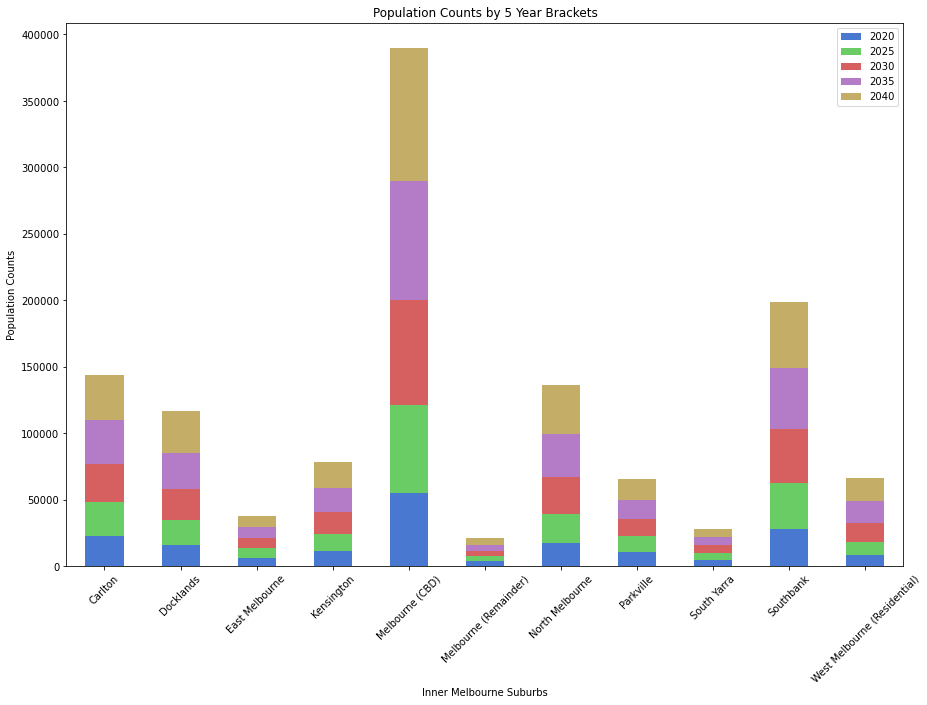

In [125]:
# ax = subs_df.plot(figsize = (15,10))
# # # ax.set_xticks(subs_df.index)
# ax.set_xticklabels(subs_df.suburb, rotation=90)
# plt.title('Population Counts by 5 Year Brackets')
# plt.ylabel('Population Counts')
# plt.xlabel('Inner Melbourne Suburbs')
# ax.plot()


# plt.bar(subs_df.suburb, subs_df['2020'])
# plt.bar(subs_df.suburb, subs_df['2025'], bottom=subs_df['2020'])
# plt.bar(subs_df.suburb, subs_df['2030'], bottom=subs_df['2020']+subs_df['2025'], color='y')
# plt.show()

ax = subs_df.plot(x= 'suburb',kind='bar', stacked=True,figsize = (15,10))
plt.style.use('seaborn-colorblind')
ax.set_xticklabels(subs_df.suburb, rotation=45)
plt.title('Population Counts by 5 Year Brackets')
plt.ylabel('Population Counts')
plt.xlabel('Inner Melbourne Suburbs')
ax.plot()

In [121]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [15]:
def pop_data_by_year(dataset, year):
    """
    Filters and cleans the Population dataset returning a new pandas dataframe focused on the year passed to the function.
    
    Note that the year must be between 2020 and 2040 inclusive. 
    """
    dataset = dataset.loc[dataset['age'] == 'Total population']
    # Extract the colomns of interest into "summary".
    summary = dataset[['geography', 'year', 'value']]
    # Convert datatypes and rename geography to suburb
    summary = summary.astype({'year':int, 'value':float, 'geography':str})
    summary.rename(columns={'geography':'suburb'}, inplace=True)
    # Extract the data matching the year passed from the summary.
    data = summary[summary['year'] == year]
   
    # Grouping the data by suburb while summing the population values. 
    data = pd.DataFrame(data.groupby('suburb')['value'].sum())
    data = data.reset_index()
    # Renaming the column "value" to "population_year" where year represents the year passed.
    data.rename(columns={'value':f'pop_{year}'}, inplace=True)
    
    # Cleaning the data and reset indexes
    data['suburb'] = data['suburb'].replace(['Melbourne (CBD)', 'Melbourne (Remainder)'], ['Melbourne', 'Melbourne'])
    data = pd.DataFrame(data.groupby('suburb')[f'pop_{year}'].sum())
    data = data.reset_index()
    
    # Removing unrequired data.
    subs_to_delete = ['West Melbourne (Industrial)', 'City of Melbourne', 'Port Melbourne']
    subs = [data.index[data['suburb']==sub].tolist()[0] for sub in subs_to_delete]
    data.drop(subs, inplace = True)

    data = data.reset_index(drop=True)
    data['suburb'] = data['suburb'].replace(['West Melbourne (Residential)'], ['West Melbourne'])
    
    # Sorting the data.
    data.sort_values('suburb', inplace = True)
    data = data.reset_index(drop=True)
    data['suburb'] = data['suburb'].astype(str)
    
    '''
    n.b Port melbourne Population count is very small. Melbourne (Remainder) was added to increase the numbers
    Although the actual population count should be more than 17,000, and not 2 as seen in the dataset'''
    
    return data

#### Create dictionary for population data

In [16]:
def create_population_dict(data):
    '''Create dictionary with a datframe for all years in the dataset'''
    population = {}
    years = data['year'].unique().tolist()
    
    for year in years:
        population[int(year)] = year_data = pop_data_by_year(data, int(year))
    
    return population
    

population_layers = create_population_dict(population_data)
population_layers

{2020:             suburb  pop_2020
 0          Carlton   22942.0
 1        Docklands   16035.0
 2   East Melbourne    6190.0
 3       Kensington   11282.0
 4        Melbourne   58366.0
 5  North Melbourne   17534.0
 6        Parkville   10593.0
 7      South Yarra    4711.0
 8        Southbank   27839.0
 9   West Melbourne    8262.0,
 2021:             suburb  pop_2021
 0          Carlton   22294.0
 1        Docklands   15869.0
 2   East Melbourne    6111.0
 3       Kensington   11293.0
 4        Melbourne   58994.0
 5  North Melbourne   17137.0
 6        Parkville   10246.0
 7      South Yarra    4653.0
 8        Southbank   27826.0
 9   West Melbourne    8310.0,
 2022:             suburb  pop_2022
 0          Carlton   22850.0
 1        Docklands   16509.0
 2   East Melbourne    6314.0
 3       Kensington   11620.0
 4        Melbourne   60739.0
 5  North Melbourne   17591.0
 6        Parkville   10572.0
 7      South Yarra    4796.0
 8        Southbank   30580.0
 9   West Melbourne 

In [17]:
# Importing victorian geo data from json file.
url = (
    'https://data.gov.au/geoserver/vic-suburb-locality-boundaries-psma-administrative-boundaries/'
    + 'wfs?request=GetFeature&typeName=ckan_af33dd8c_0534_4e18_9245_fc64440f742e&outputFormat=json')
vic_suburbs = gpd.read_file(url)
vic_suburbs_reduced = vic_suburbs[['vic_loca_2', 'geometry']]
vic_suburbs_reduced.rename(columns={'vic_loca_2':'suburb'}, inplace=True)
vic_suburbs_reduced.head()

D:\Programs\Anaconda\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


suburb                                           geometry
0  UNDERBOOL  MULTIPOLYGON (((141.74552 -35.07229, 141.74552...
1     NURRAN  MULTIPOLYGON (((148.66877 -37.39571, 148.66876...
2   WOORNDOO  MULTIPOLYGON (((142.92288 -37.97886, 142.90449...
3   DEPTFORD  MULTIPOLYGON (((147.82336 -37.66001, 147.82313...
4      YANAC  MULTIPOLYGON (((141.27978 -35.99859, 141.27989...

In [18]:
# Extract the suburbs of interest that match the population_data into "target_suburbs".
target_suburbs = population_layers[2022]['suburb'].str.upper()

# Locate the index of the target suburbs and store as a list in "subs"
subs = [vic_suburbs_reduced.index[vic_suburbs_reduced['suburb']==sub].tolist()[0] for sub in target_suburbs]

# Create a new dataframe for the melbourne suburbs "mel_suburbs" and reformat.
mel_suburbs = pd.DataFrame(vic_suburbs_reduced.iloc[subs])
mel_suburbs = mel_suburbs.reset_index(drop=True)
mel_suburbs['suburb'] = mel_suburbs['suburb'].str.title()
mel_suburbs

suburb                                           geometry
0          Carlton  MULTIPOLYGON (((144.97401 -37.80311, 144.97320...
1        Docklands  MULTIPOLYGON (((144.95376 -37.82363, 144.95336...
2   East Melbourne  MULTIPOLYGON (((144.97136 -37.80773, 144.97308...
3       Kensington  MULTIPOLYGON (((144.92282 -37.79913, 144.91977...
4        Melbourne  MULTIPOLYGON (((144.97797 -37.83867, 144.97803...
5  North Melbourne  MULTIPOLYGON (((144.95599 -37.80588, 144.95360...
6        Parkville  MULTIPOLYGON (((144.96521 -37.79315, 144.96460...
7      South Yarra  MULTIPOLYGON (((145.00455 -37.84131, 145.00453...
8        Southbank  MULTIPOLYGON (((144.97041 -37.83016, 144.97030...
9   West Melbourne  MULTIPOLYGON (((144.91648 -37.79826, 144.91754...

In [19]:
# Convert the DF to a GeoDF
melbourne_geo_data = gpd.GeoDataFrame(mel_suburbs) 

# Convert the GeoDF to a JSON format. 
melbourne_geo_data_json = melbourne_geo_data.to_json()
melbourne_geo_data_json[:200] # 2000 Char preview

'{"type": "FeatureCollection", "features": [{"id": "0", "type": "Feature", "properties": {"suburb": "Carlton"}, "geometry": {"type": "MultiPolygon", "coordinates": [[[[144.97400757, -37.80311047], [144'

In [20]:
# Testing inbuilt GeoPands Features 

#melbourne_geo_data.explore(melbourne_geo_data.area , legend=False)
# Hover over the suburbs Anj!! I think we add this as an interactive explore our traget suburbs, its just cool.

### Function to create layers for each year

In [21]:
# Create base map with Folium

melb_map = folium.Map(
    location=[-37.81368709240999, 144.95738102347036],
    #width=500, height=300,
    tiles='Cartodb Positron',
    zoom_start=12,
    min_zoom=10)

In [22]:
def create_map_layer(dataset, dataset_name, data_legend, col_name):
    folium.Choropleth(
        geo_data = melbourne_geo_data_json,
        name = dataset_name,
        data = dataset,
        columns = ['suburb', col_name],
        key_on='feature.properties.suburb', 
        fill_color = 'YlGn',
        fill_opacity = 0.7,
        line_opacity = 0.2,
        legend_name = data_legend,
    ).add_to(melb_map)

    folium.LayerControl().add_to(melb_map)
    
    '''The tooltips are not working...'''
#     # Add tooltips
#     folium.features.GeoJson(
#     data=dataset,
#     name=dataset_name,
#     smooth_factor=2,
#     style_function=lambda x: {'color':'black','fillColor':'transparent','weight':0.5},
#     tooltip=folium.features.GeoJsonTooltip(
#         fields=['suburb',
#                 col_name
#                ],
#         aliases=["Suburb:",
#                  "Population:"
#                 ], 
#         localize=True,
#         sticky=False,
#         labels=True,
#         style="""
#             background-color: #F0EFEF;
#             border: 2px solid black;
#             border-radius: 3px;
#             box-shadow: 3px;
#         """,
#         max_width=800,),
#             highlight_function=lambda x: {'weight':3,'fillColor':'grey'},
#         ).add_to(melb_map)  


In [23]:
def create_map_feature_group(dataset, dataset_name, data_legend, col_name, data_map):
    """Almost works..."""
    fg = folium.FeatureGroup(name=dataset_name,overlay=False).add_to(data_map)
    population =folium.Choropleth(
            geo_data = melbourne_geo_data_json,
            data = dataset,
            columns = ['suburb', col_name],  
            key_on = 'feature.properties.suburb', 
#             threshold_scale=custom_scale1, #use the custom scale we created for legend
            fill_color='YlGn',
            nan_fill_color="White", #Use white color if there is no data available for the county
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name = data_legend,
            highlight=True,
            overlay=False,
            line_color='black').geojson.add_to(fg)
    folium.LayerControl().add_to(data_map)
    return data_map

In [24]:
# Create feature groups
# fg1 = folium.FeatureGroup(name='New Covid-19 Cases Past 7 Days',overlay=False).add_to(us_map)
# fg2 = folium.FeatureGroup(name='Percent of Positive Cases Past 7 Days',overlay=False).add_to(us_map)


In [25]:
def add_population_to_map(dataframe,label, main_data, melb_map):    
    col_name = f'pop_{label}'
    
    if col_name not in main_data.columns:
        main_data = main_data.join(dataframe.set_index(["suburb"]), on=["suburb"])
    
    '''Swap these two lines to either have one layer or attempt to group layers... (one so far)'''
#     melb_map = create_map_feature_group(main_data, f'Population Density ({label})', f'Population Density',col_name, melb_map)
    create_map_layer(main_data, f'Population Density ({label})', f'Population Density',col_name)

    return main_data, melb_map

In [26]:
year = 2022
data = population_layers[year]

melbourne_geo_data, melb_map = add_population_to_map(data, year, melbourne_geo_data, melb_map)

In [27]:
# folium.TileLayer('cartodbdark_matter',overlay=True,name="View in Dark Mode").add_to(melb_map)
# folium.TileLayer('cartodbpositron',overlay=True,name="Viw in Light Mode").add_to(melb_map)
# folium.LayerControl(collapsed=False).add_to(melb_map)
# melb_map.save("index.html") 

In [28]:
melb_map 

In [29]:
# year = 2021
# data = population_layers[year]

# add_population_to_map(data, year)

In [30]:
pop_data_2030 = pop_data_by_year(population_data, 2030)
pop_data_2030 

suburb  pop_2030
0          Carlton   28884.0
1        Docklands   23033.0
2   East Melbourne    7866.0
3       Kensington   16322.0
4        Melbourne   83200.0
5  North Melbourne   27945.0
6        Parkville   13224.0
7      South Yarra    5638.0
8        Southbank   40646.0
9   West Melbourne   13911.0

In [31]:
# Different years
pop_data_22 = pop_data_by_year(population_data, 2022)

In [32]:
pop_data_22.head()

suburb  pop_2022
0         Carlton   22850.0
1       Docklands   16509.0
2  East Melbourne    6314.0
3      Kensington   11620.0
4       Melbourne   60739.0

In [33]:
# folium.Choropleth(
#     geo_data = melbourne_geo_data_json,
#     name = 'pop_22',
#     data = pop_data_22,
#     columns = ['geography', 'population'],
#     key_on='feature.properties.suburb', 
#     fill_color = 'YlGn',
#     fill_opacity = 0.7,
#     line_opacity = 0.2,
#     legend_name = 'Population Density 2022',
# ).add_to(melb_map)

# folium.LayerControl().add_to(melb_map)
# melb_map

In [34]:
pop_data_21 = pop_data_by_year(population_data, 2021)

In [35]:
# folium.Choropleth(
#     geo_data = melbourne_geo_data_json,
#     name = 'pop_21',
#     data = pop_data_21,
#     columns = ['geography', 'population'],
#     key_on='feature.properties.suburb', 
#     fill_color = 'YlGn',
#     fill_opacity = 0.7,
#     line_opacity = 0.2,
#     legend_name = 'Population Density 2021',
# ).add_to(melb_map)

# folium.LayerControl().add_to(melb_map)
# melb_map

-----

In [36]:
#returns a new GeoPandas DataFrame with the difference between the two years as a number and a percentage.
def population_diff(population_data, year_1, year_2):
    
    start_year = pop_data_by_year(population_data, year_1)
    end_year = pop_data_by_year(population_data, year_2)

    combined = start_year.merge(end_year, left_on='suburb', right_on='suburb')
    
    combined['change #'] = combined[list(end_year)[1]] - combined[list(start_year)[1]]
    combined['change %'] = (combined[list(combined)[3]] / combined[list(start_year)[1]])*100
    combined['geometry'] = mel_suburbs['geometry']
    
    return gpd.GeoDataFrame(combined)

In [37]:
pop_diff_2020_2030 = population_diff(population_data, 2020, 2030)
print(type(pop_diff_2020_2030))
print(pop_diff_2020_2030.dtypes)
pop_diff_2020_2030 

<class 'geopandas.geodataframe.GeoDataFrame'>
suburb        object
pop_2020     float64
pop_2030     float64
change #     float64
change %     float64
geometry    geometry
dtype: object


suburb  pop_2020  pop_2030  change #   change %  \
0          Carlton   22942.0   28884.0    5942.0  25.900096   
1        Docklands   16035.0   23033.0    6998.0  43.642033   
2   East Melbourne    6190.0    7866.0    1676.0  27.075929   
3       Kensington   11282.0   16322.0    5040.0  44.672930   
4        Melbourne   58366.0   83200.0   24834.0  42.548744   
5  North Melbourne   17534.0   27945.0   10411.0  59.376069   
6        Parkville   10593.0   13224.0    2631.0  24.837157   
7      South Yarra    4711.0    5638.0     927.0  19.677351   
8        Southbank   27839.0   40646.0   12807.0  46.003808   
9   West Melbourne    8262.0   13911.0    5649.0  68.373275   

                                            geometry  
0  MULTIPOLYGON (((144.97401 -37.80311, 144.97320...  
1  MULTIPOLYGON (((144.95376 -37.82363, 144.95336...  
2  MULTIPOLYGON (((144.97136 -37.80773, 144.97308...  
3  MULTIPOLYGON (((144.92282 -37.79913, 144.91977...  
4  MULTIPOLYGON (((144.97797 -37.83867, 144.97803...  
5  MULTIPOLYGON (((144.95599 -37.80588, 144.95360...  
6  MULTIPOLYGON (((144.96521 -37.79315, 144.96460...  
7  MULTIPOLYGON (((145.00455 -37.84131, 145.00453...  
8  MULTIPOLYGON (((144.97041 -37.83016, 144.97030...  
9  MULTIPOLYGON (((144.91648 -37.79826, 144.91754...

In [38]:
# Simple function to return a fresh map.

def change_map_folium(population_data, layer_name, zoom):
    # Create Bse Layer 
    my_map = folium.Map(
        location=[-37.81368709240999, 144.95738102347036],
        tiles='Cartodb Positron',
        zoom_start=zoom,
        min_zoom=10)

    # Create choropleth overlay
    folium.Choropleth(
        geo_data = melbourne_geo_data_json,
        name = layer_name,
        data = population_data,
        columns = ['suburb', 'change %'], # list(population_data)[1]
        key_on='feature.properties.suburb', 
        fill_color = 'YlGn',
        fill_opacity = 0.7,
        line_opacity = 0.2,
        legend_name = f'Growth of Population {layer_name} (%)',
    ).add_to(my_map)
    
    folium.LayerControl().add_to(my_map)
    
    return my_map

In [39]:
def change_map(population_data, colour, title = "Melbourne City"): # We can remove the colour parameter, I just added it for testing colours 
    # Create a GeoPands overlay # COLOUR OPTIONS: https://matplotlib.org/stable/tutorials/colors/colormaps.html
    geo_layer = population_data.explore(column ='change %', tiles='CartoDB positron', cmap=colour, name = title)
    folium.LayerControl().add_to(geo_layer)
    
    return geo_layer 

In [40]:
pop_change_1 = population_diff(population_data, 2020, 2025)  # Enter the two years to compare
map_2020_2025 = change_map(pop_change_1, 'winter') 

pop_change_2 = population_diff(population_data, 2025, 2030) 
map_2025_2030 = change_map(pop_change_2, 'winter')

pop_change_3 = population_diff(population_data, 2030, 2035) 
map_2030_2035 = change_map(pop_change_3, 'winter')

pop_change_4 = population_diff(population_data, 2035, 2040) 
map_2035_2040 = change_map(pop_change_4, 'winter')

pop_change_5 = population_diff(population_data, 2030, 2040) 
map_2020_2040 = change_map(pop_change_5, 'winter', 'Population Difference (2020 - 2040)')

In [41]:
def map_compare(map_1, map_2):
        htmlmap = HTML('<iframe srcdoc="{}" style="float:left; width: {}px; height: {}px; display:inline-block; width: 49%; margin: 0 auto; border: 2px solid #0f9295"></iframe>'
           '<iframe srcdoc="{}" style="float:right; width: {}px; height: {}px; display:inline-block; width: 49%; margin: 0 auto; border: 2px solid #0f9295"></iframe>'
           .format(map_1.get_root().render().replace('"', '&quot;'),400,400,
                   map_2.get_root().render().replace('"', '&quot;'),400,400))
        
        return display(htmlmap)

growth_5y_10y = map_compare(map_2020_2025, map_2025_2030)
growth_15y_20y = map_compare(map_2030_2035, map_2035_2040)

growth_5y_10y
growth_15y_20y
warnings.filterwarnings('ignore')

D:\Programs\Anaconda\lib\site-packages\IPython\core\display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Insert write up about observations. 

In [42]:
#map_2020_2040

## GeoPandas Take 2

In [43]:
all_subs = gpd.read_file(url)
all_subs.head(2)

id lc_ply_pid   dt_create  \
0  ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1       6670  2011-08-31   
1  ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2       6671  2011-08-31   

  dt_retire  loc_pid  vic_locali vic_loca_1 vic_loca_2 vic_loca_3 vic_loca_4  \
0      None  VIC2615  2012-04-27       None  UNDERBOOL       None       None   
1      None  VIC1986  2012-04-27       None     NURRAN       None       None   

  vic_loca_5 vic_loca_6 vic_loca_7  \
0          G       None          2   
1          G       None          2   

                                            geometry  
0  MULTIPOLYGON (((141.74552 -35.07229, 141.74552...  
1  MULTIPOLYGON (((148.66877 -37.39571, 148.66876...

In [44]:
all_subs_df = all_subs[['vic_loca_2', 'geometry']]
all_subs_df.rename(columns={'vic_loca_2':'suburb'}, inplace=True)
all_subs_df.head()

suburb                                           geometry
0  UNDERBOOL  MULTIPOLYGON (((141.74552 -35.07229, 141.74552...
1     NURRAN  MULTIPOLYGON (((148.66877 -37.39571, 148.66876...
2   WOORNDOO  MULTIPOLYGON (((142.92288 -37.97886, 142.90449...
3   DEPTFORD  MULTIPOLYGON (((147.82336 -37.66001, 147.82313...
4      YANAC  MULTIPOLYGON (((141.27978 -35.99859, 141.27989...

In [45]:
# Extract the suburbs of interest that match the population_data into "target_suburbs".
target_subs = population_layers[2022]['suburb'].str.upper()

# Locate the index of the target suburbs and store as a list in "subs"
subs = [all_subs_df.index[all_subs_df['suburb']==sub].tolist()[0] for sub in target_subs]

#Remove unwanted rows and keep data in geo dataframe format
city_suburbs = all_subs_df.take(list(subs))
city_suburbs.reset_index(drop=True, inplace = True)
city_suburbs['suburb'] = city_suburbs['suburb'].str.title()

city_suburbs

suburb                                           geometry
0          Carlton  MULTIPOLYGON (((144.97401 -37.80311, 144.97320...
1        Docklands  MULTIPOLYGON (((144.95376 -37.82363, 144.95336...
2   East Melbourne  MULTIPOLYGON (((144.97136 -37.80773, 144.97308...
3       Kensington  MULTIPOLYGON (((144.92282 -37.79913, 144.91977...
4        Melbourne  MULTIPOLYGON (((144.97797 -37.83867, 144.97803...
5  North Melbourne  MULTIPOLYGON (((144.95599 -37.80588, 144.95360...
6        Parkville  MULTIPOLYGON (((144.96521 -37.79315, 144.96460...
7      South Yarra  MULTIPOLYGON (((145.00455 -37.84131, 145.00453...
8        Southbank  MULTIPOLYGON (((144.97041 -37.83016, 144.97030...
9   West Melbourne  MULTIPOLYGON (((144.91648 -37.79826, 144.91754...

In [46]:
type(city_suburbs)

geopandas.geodataframe.GeoDataFrame

In [47]:
#city_suburbs.explore()

In [48]:
city_suburbs_pop = city_suburbs.join(population_layers[2022].set_index(["suburb"]), on=["suburb"])
print(type(city_suburbs_pop))
city_suburbs_pop

<class 'geopandas.geodataframe.GeoDataFrame'>


suburb                                           geometry  \
0          Carlton  MULTIPOLYGON (((144.97401 -37.80311, 144.97320...   
1        Docklands  MULTIPOLYGON (((144.95376 -37.82363, 144.95336...   
2   East Melbourne  MULTIPOLYGON (((144.97136 -37.80773, 144.97308...   
3       Kensington  MULTIPOLYGON (((144.92282 -37.79913, 144.91977...   
4        Melbourne  MULTIPOLYGON (((144.97797 -37.83867, 144.97803...   
5  North Melbourne  MULTIPOLYGON (((144.95599 -37.80588, 144.95360...   
6        Parkville  MULTIPOLYGON (((144.96521 -37.79315, 144.96460...   
7      South Yarra  MULTIPOLYGON (((145.00455 -37.84131, 145.00453...   
8        Southbank  MULTIPOLYGON (((144.97041 -37.83016, 144.97030...   
9   West Melbourne  MULTIPOLYGON (((144.91648 -37.79826, 144.91754...   

   pop_2022  
0   22850.0  
1   16509.0  
2    6314.0  
3   11620.0  
4   60739.0  
5   17591.0  
6   10572.0  
7    4796.0  
8   30580.0  
9    8585.0

In [49]:
type(city_suburbs_pop)

geopandas.geodataframe.GeoDataFrame

In [50]:
#city_suburbs_pop.explore(column = 'pop_2022', name = 'Population (thousands) 2022')

In [51]:
# Save the layer view as a map layer
pop_m = city_suburbs_pop.explore(column = 'pop_2022', name = 'Population (thousands) 2022')

# Add layer control for user
folium.LayerControl().add_to(pop_m)

# display the map
pop_m

In [52]:
city_suburbs_pop = city_suburbs_pop.join(population_layers[2030].set_index(["suburb"]), on=["suburb"])
city_suburbs_pop

suburb                                           geometry  \
0          Carlton  MULTIPOLYGON (((144.97401 -37.80311, 144.97320...   
1        Docklands  MULTIPOLYGON (((144.95376 -37.82363, 144.95336...   
2   East Melbourne  MULTIPOLYGON (((144.97136 -37.80773, 144.97308...   
3       Kensington  MULTIPOLYGON (((144.92282 -37.79913, 144.91977...   
4        Melbourne  MULTIPOLYGON (((144.97797 -37.83867, 144.97803...   
5  North Melbourne  MULTIPOLYGON (((144.95599 -37.80588, 144.95360...   
6        Parkville  MULTIPOLYGON (((144.96521 -37.79315, 144.96460...   
7      South Yarra  MULTIPOLYGON (((145.00455 -37.84131, 145.00453...   
8        Southbank  MULTIPOLYGON (((144.97041 -37.83016, 144.97030...   
9   West Melbourne  MULTIPOLYGON (((144.91648 -37.79826, 144.91754...   

   pop_2022  pop_2030  
0   22850.0   28884.0  
1   16509.0   23033.0  
2    6314.0    7866.0  
3   11620.0   16322.0  
4   60739.0   83200.0  
5   17591.0   27945.0  
6   10572.0   13224.0  
7    4796.0    5638.0  
8   30580.0   40646.0  
9    8585.0   13911.0

In [53]:
com = city_suburbs.explore(name = 'Melbourne Cities')

city_suburbs.join(population_layers[2022].set_index(["suburb"]), on=["suburb"]).explore(m = com, column = 'pop_2022', name = 'Population (thousands) 2022')
city_suburbs.join(population_layers[2030].set_index(["suburb"]), on=["suburb"]).explore(m = com, column = 'pop_2030', name = 'Population (thousands) 2030')
city_suburbs.join(population_layers[2040].set_index(["suburb"]), on=["suburb"]).explore(m = com, column = 'pop_2040', name = 'Population (thousands) 2040')

folium.TileLayer(control=True).add_to(com)  # use folium to add alternative tiles
folium.LayerControl().add_to(com)
com

#### VicRoads Traffic Dataset

In [54]:
traffic_url = 'https://vicroadsopendata-vicroadsmaps.opendata.arcgis.com/datasets/5512df2ff41e4941bacf868053dbfba9_0.csv?outSR=%7B%22latestWkid%22%3A3111%2C%22wkid%22%3A102171%7D'

In [55]:
traffic_data = pd.read_csv(traffic_url)

In [56]:
traffic_data.head()

OBJECTID_1  OBJECTID  TIS_ID  HMGNS_FLOW_ID  HMGNS_LNK_ID  \
0           1       743   14915          14915          2006   
1           2       650   14140          14140          8786   
2           3       701   12113          12113          6035   
3           4       702   12897          12897          7079   
4           5       703    9893           9893          3475   

                                      HMGNS_LNK_DESC        LGA_SHORT_NM  \
0   MARYSVILLE-WOODS POINT ROAD btwn LAKE MOUNTAI...        YARRA RANGES   
1   STEELS CREEK ROAD btwn WILLOWBEND DRIVE & ELT...        YARRA RANGES   
2   LATROBE ROAD btwn TANJIL EAST ROAD & GORDON S...             LATROBE   
3   CASTERTON ROAD btwn GLENELG HIGHWAY & COLERAI...  SOUTHERN GRAMPIANS   
4         HUTTON ROAD btwn CHAPEL ROAD & GREENS ROAD           DANDENONG   

                      RGN_LONG_NM  ROAD_NBR             DECLARED_ROAD_NM  ...  \
0  METROPOLITAN SOUTH EAST REGION      4961  MARYSVILLE-WOODS POINT ROAD  ...   
1  METROPOLITAN SOUTH EAST REGION      9999               Not Applicable  ...   
2                  EASTERN REGION      5911  MORWELL-YALLOURN NORTH ROAD  ...   
3            SOUTH WESTERN REGION      2670              GLENELG HIGHWAY  ...   
4  METROPOLITAN SOUTH EAST REGION      5168      BRAESIDE-DANDENONG ROAD  ...   

  TWO_WAY_AADT_TRUCKS ALLVEH_AMPEAK_AADT ALLVEH_PMPEAK_AADT GROWTH_RATE  \
0                 0.0                NaN                NaN       0.013   
1                40.0                NaN                NaN       0.019   
2               160.0                NaN                NaN       0.015   
3               340.0                NaN                NaN       0.020   
4              1500.0             1000.0             1100.0       0.003   

      CI AM_PEAK_SPEED OFF_PEAK_SPEED PM_PEAK_SPEED    YR  \
0  0.005           NaN            NaN           NaN  2020   
1  0.002           NaN            NaN           NaN  2020   
2  0.009           NaN            NaN           NaN  2020   
3  0.001           NaN            NaN           NaN  2020   
4  0.002           NaN            NaN           NaN  2020   

                         LABEL  
0      24* (13% 3*) EAST BOUND  
1    373* (6% 22*) NORTH BOUND  
2  1,100* (6% 61*) NORTH BOUND  
3   801* (21% 165*) WEST BOUND  
4  12,000 (6% 744*) WEST BOUND  

[5 rows x 50 columns]

In [57]:
print(traffic_data['LGA_SHORT_NM'].unique())

['YARRA RANGES' 'LATROBE' 'SOUTHERN GRAMPIANS' 'DANDENONG' 'BRIMBANK'
 'WELLINGTON' 'WYNDHAM' 'KNOX' 'HUME' 'EAST GIPPSLAND' 'BAYSIDE' 'BENALLA'
 'MOIRA' 'NILLUMBIK' 'CASEY' 'LODDON' 'MAROONDAH' 'KINGSTON' 'GLENELG'
 'MORNINGTON PENINSULA' 'MANNINGHAM' 'DAREBIN' 'CORANGAMITE' 'SURF COAST'
 'TOWONG' 'WEST WIMMERA' 'BENDIGO' 'GEELONG' 'BASS COAST'
 '(MOUNT STIRLING)' 'MOYNE' 'QUEENSCLIFFE' 'BAW BAW' 'BALLARAT'
 'CENTRAL GOLDFIELDS' 'FRANKSTON' 'PYRENEES' 'WHITTLESEA' 'MARIBYRNONG'
 'INDIGO' 'MOUNT ALEXANDER' 'MELBOURNE' 'BANYULE' 'SOUTH GIPPSLAND'
 'STONNINGTON' 'GOLDEN PLAINS' 'SHEPPARTON' 'MORELAND' 'BOROONDARA'
 'NORTHERN GRAMPIANS' 'YARRA' 'ALPINE' 'WHITEHORSE' 'COLAC OTWAY'
 'WANGARATTA' 'MACEDON RANGES' 'ARARAT' 'HORSHAM' 'WODONGA' 'HOBSONS BAY'
 'CARDINIA' 'MILDURA' 'PORT PHILLIP' 'MOORABOOL' 'BULOKE' 'MITCHELL'
 'MURRINDINDI' 'MONASH' 'HINDMARSH' 'MELTON' 'MOONEE VALLEY' 'WARRNAMBOOL'
 'YARRIAMBIACK' 'MANSFIELD' 'GLEN EIRA' 'GANNAWARRA' 'CAMPASPE'
 'SWAN HILL' 'STRATHBOGIE' 'HEPB

In [58]:
melb_traffic = traffic_data.where(traffic_data['LGA_SHORT_NM']=='MELBOURNE')

In [59]:
melb_traffic['LGA_SHORT_NM'].unique()

array([nan, 'MELBOURNE'], dtype=object)

In [60]:
melb_traffic.dropna(subset = ['LGA_SHORT_NM'], inplace = True)
melb_traffic

OBJECTID_1  OBJECTID   TIS_ID  HMGNS_FLOW_ID  HMGNS_LNK_ID  \
95           96.0    1288.0     53.0           53.0        3458.0   
104         105.0    1297.0    615.0          615.0        4654.0   
134         135.0    1406.0   1092.0         1092.0        1555.0   
156         157.0    1311.0   1359.0         1359.0        2886.0   
160         161.0    1315.0   2266.0         2266.0        2919.0   
...           ...       ...      ...            ...           ...   
14548     14549.0   15159.0  15242.0        15242.0        2474.0   
14549     14550.0   15160.0  15868.0        15868.0        2477.0   
14570     14571.0   33578.0   6447.0         6447.0        8561.0   
14589     14590.0   15446.0  13346.0        13346.0        7409.0   
14612     14613.0   15770.0  14498.0        14498.0        2160.0   

                                          HMGNS_LNK_DESC LGA_SHORT_NM  \
95      FOOTSCRAY ROAD btwn WESTERN LINK TOLLWAY Onra...    MELBOURNE   
104     CITY ROAD btwn ALEXANDRA AVENUE & SOUTHBANK B...    MELBOURNE   
134     WESTERN LINK TOLLWAY btwn WESTERN LINK TOLLWA...    MELBOURNE   
156     HARKER STREET btwn FLEMINGTON ROAD & ERROL ST...    MELBOURNE   
160        DYNON ROAD btwn DOCK LINK ROAD & LLOYD STREET    MELBOURNE   
...                                                  ...          ...   
14548   FLINDERS STREET btwn ELIZABETH STREET & ST KI...    MELBOURNE   
14549   ELIZABETH STREET btwn COLLINS STREET & BOURKE...    MELBOURNE   
14570   POWER STREET btwn WEST GATE FREEWAY & SOUTHER...    MELBOURNE   
14589   BOURKE STREET btwn SWANSTON STREET WALK & RUS...    MELBOURNE   
14612   MONTAGUE ST SE BD BTWN WEST GATE FWY & WEST G...    MELBOURNE   

                          RGN_LONG_NM  ROAD_NBR      DECLARED_ROAD_NM  ...  \
95     METROPOLITAN NORTH WEST REGION    2120.0     DOCKLANDS HIGHWAY  ...   
104    METROPOLITAN NORTH WEST REGION    2240.0    YARRA BANK HIGHWAY  ...   
134    METROPOLITAN NORTH WEST REGION    2999.0  WESTERN LINK TOLLWAY  ...   
156    METROPOLITAN NORTH WEST REGION    5026.0         HARKER STREET  ...   
160    METROPOLITAN NORTH WEST REGION    5035.0            DYNON ROAD  ...   
...                               ...       ...                   ...  ...   
14548  METROPOLITAN NORTH WEST REGION    9999.0        Not Applicable  ...   
14549  METROPOLITAN NORTH WEST REGION    9999.0        Not Applicable  ...   
14570  METROPOLITAN NORTH WEST REGION    8040.0           7824F 2240F  ...   
14589  METROPOLITAN NORTH WEST REGION    9999.0        Not Applicable  ...   
14612  METROPOLITAN NORTH WEST REGION    2120.0     DOCKLANDS HIGHWAY  ...   

      TWO_WAY_AADT_TRUCKS ALLVEH_AMPEAK_AADT ALLVEH_PMPEAK_AADT GROWTH_RATE  \
95                 1700.0                NaN                NaN      -0.001   
104                1400.0                NaN                NaN       0.002   
134               14000.0                NaN                NaN       0.026   
156                 720.0                NaN                NaN       0.014   
160                3300.0                NaN                NaN       0.003   
...                   ...                ...                ...         ...   
14548              1200.0                NaN                NaN      -0.014   
14549               540.0                NaN                NaN      -0.007   
14570               760.0                NaN                NaN       0.022   
14589                 NaN                NaN                NaN      -0.012   
14612              2700.0             1800.0             1000.0      -0.001   

          CI AM_PEAK_SPEED OFF_PEAK_SPEED PM_PEAK_SPEED      YR  \
95     0.001           NaN            NaN           NaN  2020.0   
104    0.002           NaN            NaN           NaN  2020.0   
134    0.003           NaN            NaN           NaN  2020.0   
156    0.003           NaN            NaN           NaN  2020.0   
160    0.005           NaN            NaN           NaN  2020.0   
...      ... 

In [61]:
list(melb_traffic.columns)

['OBJECTID_1',
 'OBJECTID',
 'TIS_ID',
 'HMGNS_FLOW_ID',
 'HMGNS_LNK_ID',
 'HMGNS_LNK_DESC',
 'LGA_SHORT_NM',
 'RGN_LONG_NM',
 'ROAD_NBR',
 'DECLARED_ROAD_NM',
 'LOCAL_ROAD_NM',
 'ALT_ROAD_NM',
 'RMA_CLSFCN_CD',
 'RMA_CLSFCN_GROUP',
 'RMA_DESC',
 'SRNS',
 'SRNS_CD',
 'SRNS_DESC',
 'RMC',
 'FLOW',
 'HMGNS_FLOW_LENGTH',
 'ALLVEHS_MMW',
 'ALLVEH_CALC',
 'ALLVEHS_AADT',
 'BUSES_MMW',
 'BUSES_AADT',
 'TRAMS_MMW',
 'TRAMS_AADT',
 'MOTORCYCLES_MMW',
 'MOTORCYCLES_AADT',
 'MOTORCYCLE_CALC',
 'TRUCKS_MMW',
 'TRUCKS_AADT',
 'TRUCK_CALC',
 'PER_TRUCKS_AADT',
 'EHV',
 'PER_HV',
 'PER_LV',
 'ESA',
 'TWO_WAY_AADT',
 'TWO_WAY_AADT_TRUCKS',
 'ALLVEH_AMPEAK_AADT',
 'ALLVEH_PMPEAK_AADT',
 'GROWTH_RATE',
 'CI',
 'AM_PEAK_SPEED',
 'OFF_PEAK_SPEED',
 'PM_PEAK_SPEED',
 'YR',
 'LABEL']

In [62]:
melb_traffic.iloc[0]#['HMGNS_LNK_DESC']

OBJECTID_1                                                            96
OBJECTID                                                            1288
TIS_ID                                                                53
HMGNS_FLOW_ID                                                         53
HMGNS_LNK_ID                                                        3458
HMGNS_LNK_DESC          FOOTSCRAY ROAD btwn WESTERN LINK TOLLWAY Onra...
LGA_SHORT_NM                                                   MELBOURNE
RGN_LONG_NM                               METROPOLITAN NORTH WEST REGION
ROAD_NBR                                                            2120
DECLARED_ROAD_NM                                       DOCKLANDS HIGHWAY
LOCAL_ROAD_NM                                             FOOTSCRAY ROAD
ALT_ROAD_NM                                               Not Applicable
RMA_CLSFCN_CD                                                         AH
RMA_CLSFCN_GROUP                                   

### Bus Stops 

In [63]:
# https://dev.socrata.com/foundry/data.melbourne.vic.gov.au/vzsu-xnf6

apptoken = os.environ.get("SODAPY_APPTOKEN") # Anonymous App Token
domain = "data.melbourne.vic.gov.au"
client = Socrata(domain, apptoken)           # Open Dataset Connection
bus_data_unique_identifier = 'vzsu-xnf6'   

bus_stop_data = gpd.GeoDataFrame.from_dict(client.get_all(bus_data_unique_identifier))

In [64]:
print(bus_stop_data.shape)
print(bus_stop_data.dtypes)

bus_stop_data.head()

(309, 15)
the_geom      object
objectid      object
mcc_id        object
str_id        object
asset_clas    object
asset_type    object
asset_subt    object
descriptio    object
model_no      object
model_desc    object
prop_id       object
roadseg_id    object
addresspt_    object
addresspt1    object
addressp_1    object
dtype: object


the_geom objectid   mcc_id  \
0  {'type': 'Point', 'coordinates': [144.92185552...      303  1581210   
1  {'type': 'Point', 'coordinates': [144.93239283...      355  1235255   
2  {'type': 'Point', 'coordinates': [144.96381338...      434  1236981   
3  {'type': 'Point', 'coordinates': [144.95134039...      519  1250659   
4  {'type': 'Point', 'coordinates': [144.95817942...      600  1231226   

    str_id asset_clas               asset_type asset_subt  \
0  1581210    Signage  Sign - Public Transport              
1  1235255    Signage  Sign - Public Transport              
2  1236981    Signage  Sign - Public Transport              
3  1250659    Signage  Sign - Public Transport              
4  1231226    Signage  Sign - Public Transport              

                                         descriptio model_no  \
0   Sign - Public Transport 1 Panel Bus Stop Type 8     P.16   
1  Sign - Public Transport 1 Panel Bus Stop Type 13     P.16   
2   Sign - Public Transport 1 Panel Bus Stop Type 8     P.16   
3   Sign - Public Transport 1 Panel Bus Stop Type 8     P.16   
4   Sign - Public Transport 1 Panel Bus Stop Type 8     P.16   

                        model_desc prop_id roadseg_id addresspt_   addresspt1  \
0  Sign - Public Transport 1 Panel       0      23147          0          0.0   
1  Sign - Public Transport 1 Panel       0      21673     570648  76.81982435   
2  Sign - Public Transport 1 Panel       0      20114     511385  37.37639771   
3  Sign - Public Transport 1 Panel       0      22312     103829  32.27346068   
4  Sign - Public Transport 1 Panel       0      20184     548056  21.56130407   

  addressp_1  
0          0  
1        357  
2        102  
3        265  
4         83

### Tram Tracks Dataset 

In [65]:
# https://data.melbourne.vic.gov.au/Transport/Tram-tracks/wqka-kyhz

apptoken = os.environ.get("SODAPY_APPTOKEN") # Anonymous App Token
domain = "data.melbourne.vic.gov.au"
client = Socrata(domain, apptoken)           # Open Dataset Connection
tram_data_unique_identifier = 'au2t-98pn'   

tram_track_data = gpd.GeoDataFrame.from_dict(client.get_all(tram_data_unique_identifier))

In [66]:
#tram_track_data.rename(columns={'the_geom':'geometry'}, inplace=True)
print(tram_track_data.shape)
print(tram_track_data.dtypes)

tram_track_data.head()

(645, 3)
the_geom      object
name          object
descriptio    object
dtype: object


the_geom   name  \
0  {'type': 'MultiPolygon', 'coordinates': [[[[14...  kml_1   
1  {'type': 'MultiPolygon', 'coordinates': [[[[14...  kml_2   
2  {'type': 'MultiPolygon', 'coordinates': [[[[14...  kml_3   
3  {'type': 'MultiPolygon', 'coordinates': [[[[14...  kml_4   
4  {'type': 'MultiPolygon', 'coordinates': [[[[14...  kml_5   

                                          descriptio  
0  <center><table><tr><th colspan='2' align='cent...  
1  <center><table><tr><th colspan='2' align='cent...  
2  <center><table><tr><th colspan='2' align='cent...  
3  <center><table><tr><th colspan='2' align='cent...  
4  <center><table><tr><th colspan='2' align='cent...

In [67]:

# Functions for converting GeoJSON datasets into GeoPandas Formats. 
def get_coords(row):
    """
    Converts the geometry column entries of the datafile row into shapely polygons.
    row: a single row entry for a dataframe  
    Code Snippit from: Ideal Green Roof Locations: Melbourne 
    """
    row["geometry"] = Polygon(row['geometry']['coordinates'][0][0])

    return row


def convert_dataset(dataframe):
    """
    Converts the downloaded GeoJSON dataset into a usable Geopandas format
    using the 4326 coordinate system.
    """
    # Rename the column to be recognisable to geopandas
    new_dataframe = dataframe.rename(columns={"the_geom" : "geometry"})

    # Apply the get_coords method to each row
    new_dataframe.apply(get_coords, axis=1)

    return gpd.GeoDataFrame(new_dataframe, geometry='geometry', crs=4326)

In [68]:
# tram_track_data_gpd = convert_dataset(tram_track_data)

In [69]:
# type(tram_track_data_gpd)

In [70]:

# Save the layer view as a map layer
# tram_tracks_map = tram_track_data_gpd.explore(tiles='CartoDB positron', name = 'Tram Tracks', color='green')
# folium.LayerControl().add_to(tram_tracks_map)
# tram_tracks_map

In [71]:
def draw_tram_map(tramlines, melbourne_city):
    #Create city map
    m =  melbourne_city.explore(name = 'Melbourne City Suburbs',color= '#22e4ac')
    
    style = {'fillColor': '#056b8a', 'color': '#056b8a'}
    folium.GeoJson(
        tramlines,
        name='Tram Lines',            
        style_function=lambda x:style,
#             tooltip=folium.features.GeoJsonTooltip(fields=['name','direction','type','notes'])
        ).add_to(m)
    
    folium.LayerControl().add_to(m)
    return m

In [72]:
tram_track_data_gpd = convert_dataset(tram_track_data)

tram_map = draw_tram_map(tram_track_data_gpd, city_suburbs)

In [73]:
tram_map

## Combine Bike Path & bike counts Datasets into one eploration

In [74]:
apptoken = os.environ.get("SODAPY_APPTOKEN") # Anonymous App Token
domain = "data.melbourne.vic.gov.au"
client = Socrata(domain, apptoken)           # Open Dataset Connection

In [75]:
bike_data_unique_identifier = 'hmuz-nz6m' 
Tuesday_data = 'uyp8-7ii8'

In [76]:
def get_bike_data(bikecounts, bikepaths):
    # Bike paths
    bike_geo_data_url = 'https://'+ domain +'/api/geospatial/'+ bikepaths +'?method=export&format=GeoJSON'
    with urlopen(bike_geo_data_url) as result:
        bike_route_data = json.load(result)
    
    # Bike Counts
    bikecountdf =  pd.DataFrame.from_dict(client.get_all(bikecounts))
    bikecountdf =  gpd.GeoDataFrame(bikecountdf[['latitude','longitude','total','year', 'description']])
    bikecountdf.dropna(inplace=True)   

    # Covert year column to int
    years = [int(x) for x in bikecountdf['year'].unique()]

    #get latest poll data
    bikecountdf = bikecountdf.loc[bikecountdf['year'] == str(max(years))]
        
    degs = ['latitude','longitude']
    for col in degs:
        bikecountdf[col] = bikecountdf[col].astype(float)
    bikecountdf['total'] = bikecountdf['total'].astype(int)
    bikecountdf.reset_index(drop=True, inplace = True)
    df_geometry = [Point(xy) for xy in zip(bikecountdf['latitude'], bikecountdf['longitude'])]
    bikecountdf = gpd.GeoDataFrame(bikecountdf, crs = 4326, geometry = df_geometry)
    
    return bikecountdf, bike_route_data

In [77]:
def draw_heatMap(data, bikepath = None, heat_m = False, colour = 'blue'):
    
    if type(heat_m) != bool :
        m =  heat_m.explore(name = 'Melbourne City Suburbs',color= '#22e4ac') # Can't quite work out the "scheme" for colours
    else:
        m = folium.Map(location = (-37.81368709240999, 144.95738102347036), zoom_start=13,min_zoom=10)
    
#     style = {'fillColor': '#22e4ac', 'color': '#14a38e'}
    style = {'fillColor': '#056b8a', 'color': '#056b8a'}
    if bikepath != None:
        folium.GeoJson(
            bikepath,
            name='Bike Routes',            
            style_function=lambda x:style,
            tooltip=folium.features.GeoJsonTooltip(fields=['name','direction','type','notes'])
            ).add_to(m)
        
    # Bike counts
    labels = data['description']
    data = list(map(list, zip(data['latitude'], data['longitude'],data['total'])))        
    HeatMap(data, name='Bike Counts').add_to(m)
    # for i, loc in enumerate(data):
    #     folium.Marker(location=[loc[0], loc[1]],
    #                   popup=f'<strong>{labels[i]}</strong>',
    #                   tooltip=f'Bike Count: {loc[2]}',
    #                   icon = folium.Icon(color = colour)
    #                  ).add_to(m)
    folium.LayerControl().add_to(m)
    return m

In [78]:
super_tuesday, bike_paths = get_bike_data(Tuesday_data,bike_data_unique_identifier)

bike_map = draw_heatMap(super_tuesday,bike_paths, city_suburbs, colour = 'green')

In [79]:
bike_paths.keys()

dict_keys(['type', 'features'])

In [80]:
bike_map # This is better without the markers. It's too crowded otherwise. 
# Also, how about we colour the on-road V off-road bike paths a different colour. 
# The goal here is evaluate the hotspots.
    # Are they hot because of the infrastraucture provided or should we be prioritising safe bikeways here.
''' I had the markers so that you know what the hot spots actually were...
    Im easy, whatever suits.'''

### Bike Route Data

In [81]:
apptoken = os.environ.get("SODAPY_APPTOKEN") # Anonymous App Token
domain = "data.melbourne.vic.gov.au"
client = Socrata(domain, apptoken)           # Open Dataset Connection
bike_data_unique_identifier = 'hmuz-nz6m'   

# bike_route_data = gpd.GeoDataFrame.from_dict(client.get_all(bike_data_unique_identifier))

bike_geo_data_url = 'https://'+ domain +'/api/geospatial/'+ bike_data_unique_identifier +'?method=export&format=GeoJSON'
with urlopen(bike_geo_data_url) as result:
    bike_route_data = json.load(result)

bike_route_data.keys()

dict_keys(['type', 'features'])

In [82]:
bike_route_data['features'][0]['properties'].keys()

dict_keys(['name', 'direction', 'info', 'status', 'notes', 'type'])

In [83]:
# Create Base Layer
m = folium.Map(
    location=[-37.81368709240999, 144.95738102347036],
    tiles='Cartodb Positron',
    zoom_start=13,
    min_zoom=10)
folium.GeoJson(
    bike_route_data,
    name='Bike Routes',
    tooltip=folium.features.GeoJsonTooltip(fields=['name','direction','type','notes'])
    ).add_to(m)
folium.LayerControl().add_to(m)

m

#### VicRoads Transportation Accidents Dataset

In [84]:
# This url is for a zip file which contains multiple csv files
crash_url = 'https://vicroadsopendatastorehouse.vicroads.vic.gov.au/opendata/Road_Safety/ACCIDENT.zip'

In [85]:
crash_request = requests.get(crash_url)

Read the zip file and view filename contents

In [86]:
crash_files = zf.ZipFile(BytesIO(crash_request.content))
print(crash_files.namelist())

['ACCIDENT.csv', 'ACCIDENT_CHAINAGE.csv', 'ACCIDENT_EVENT.csv', 'ACCIDENT_LOCATION.csv', 'ATMOSPHERIC_COND.csv', 'NODE.csv', 'NODE_ID_COMPLEX_INT_ID.csv', 'PERSON.csv', 'ROAD_SURFACE_COND.csv', 'Statistic Checks.csv', 'SUBDCA.csv', 'VEHICLE.csv']


Save the 'ACCIDENT.csv' file to a temp folder and load into a dataframe

In [87]:
accident = crash_files.extract('ACCIDENT.csv', 'temp')
accident = pd.read_csv(accident, low_memory=False)
accident.head()

ACCIDENT_NO ACCIDENTDATE                    ACCIDENTTIME  ACCIDENT_TYPE  \
0  T20060000010   13/01/2006  12:42:00                                    1   
1  T20060000018   13/01/2006  19:10:00                                    1   
2  T20060000022   14/01/2006  12:10:00                                    7   
3  T20060000023   14/01/2006  11:49:00                                    1   
4  T20060000026   14/01/2006  10:45:00                                    1   

               Accident Type Desc  DAY_OF_WEEK Day Week Description  DCA_CODE  \
0          Collision with vehicle            6               Friday       113   
1          Collision with vehicle            6               Friday       113   
2  Fall from or in moving vehicle            7             Saturday       190   
3          Collision with vehicle            7             Saturday       130   
4          Collision with vehicle            7             Saturday       121   

                                  DCA Description DIRECTORY  ... NO_PERSONS  \
0  RIGHT NEAR (INTERSECTIONS ONLY)                      MEL  ...          6   
1  RIGHT NEAR (INTERSECTIONS ONLY)                      MEL  ...          4   
2        FELL IN/FROM VEHICLE                           MEL  ...          2   
3  REAR END(VEHICLES IN SAME LANE)                      MEL  ...          2   
4           RIGHT THROUGH                               MEL  ...          3   

  NO_PERSONS_INJ_2 NO_PERSONS_INJ_3 NO_PERSONS_KILLED  NO_PERSONS_NOT_INJ  \
0                0                1                 0                   5   
1                0                1                 0                   3   
2                1                0                 0                   1   
3                1                0                 0                   1   
4                0                3                 0                   0   

  POLICE_ATTEND  ROAD_GEOMETRY   Road Geometry Desc  SEVERITY  SPEED_ZONE  
0             1              1   Cross intersection         3          60  
1             1              2       T intersection         3          70  
2             1              5  Not at intersection         2         100  
3             1              2       T intersection         2          80  
4             1              5  Not at intersection         3          50  

[5 rows x 28 columns]

### Super Tuesday / Super Sunday Bike useage Data

In [88]:
def get_bike_data(datafile):
    df =  pd.DataFrame.from_dict(client.get_all(datafile))
    df =  gpd.GeoDataFrame(df[['latitude','longitude','total','year', 'description']])
    df.dropna(inplace=True)
    

    # Covert year column to int
    years = [int(x) for x in df['year'].unique()]

    #get latest poll data
    df = df.loc[df['year'] == str(max(years))]
        
    degs = ['latitude','longitude']
    for col in degs:
        df[col] = df[col].astype(float)
    df['total'] = df['total'].astype(int)
    df.reset_index(drop=True, inplace = True)
    df_geometry = [Point(xy) for xy in zip(df['latitude'], df['longitude'])]
    df = gpd.GeoDataFrame(df, crs = 4326, geometry = df_geometry)
    return df

In [89]:
def draw_heatMap(data, heat_m = None, bikepath = None, colour = 'blue'):
    labels = data['description']
    if heat_m == None:
        m = folium.Map(location = (-37.81368709240999, 144.95738102347036), zoom_start=13,min_zoom=10)
    
    if bikepath != None:
        folium.GeoJson(
            bikepath,
            name='Bike Routes',
            tooltip=folium.features.GeoJsonTooltip(fields=['name','direction','type','notes'])
            ).add_to(m)
        
    data = list(map(list, zip(data['latitude'], data['longitude'],data['total'])))        
    HeatMap(data).add_to(m)
    for i, loc in enumerate(data):
        folium.Marker(location=[loc[0], loc[1]],
                      popup=f'<strong>{labels[i]}</strong>',
                      tooltip=f'Bike Count: {loc[2]}',
                      icon = folium.Icon(color = colour)
                     ).add_to(m)
    folium.LayerControl().add_to(m)
    return m


#### Tuesday - Weekday

In [90]:
# Getting the data

super_tuesday = get_bike_data('uyp8-7ii8')
print(super_tuesday.shape)
super_tuesday.head(3)

(46, 6)


latitude   longitude  total  year  \
0 -37.825963  144.960053    249  2017   
1 -37.787979  144.959000   1425  2017   
2 -37.793993  144.941956     42  2017   

                                         description  \
0  Queens Bridge St [N], City Rd [NE], Morray St ...   
1  Royal Pde/shared path [N], Royal Pde/shared pa...   
2        Melrose St [N], Melrose St [S], Mark St [W]   

                      geometry  
0  POINT (-37.82596 144.96005)  
1  POINT (-37.78798 144.95900)  
2  POINT (-37.79399 144.94196)

In [91]:
draw_heatMap(super_tuesday, bikepath = bike_route_data)

#### Sunday - Weekend

In [92]:
# Getting the data

super_sunday = get_bike_data('v9mu-dvfu')
print(super_sunday.shape)
super_sunday.head(3)

(9, 6)


latitude   longitude  total  year  \
0 -37.806401  144.908090    596  2017   
1 -37.809895  144.935722    190  2017   
2 -37.823699  144.956026   9170  2017   

                                         description  \
0  Maribyrnong River Trail [N], Docklands Hwy [E]...   
1  Moonee Ponds Crk Trail [N], Footscray Rd [E], ...   
2  Southbank Prom [NE], Clarendon St [SE], Conven...   

                      geometry  
0  POINT (-37.80640 144.90809)  
1  POINT (-37.80989 144.93572)  
2  POINT (-37.82370 144.95603)

In [93]:
draw_heatMap(super_sunday, colour = 'orange')